In [1]:
import cv2
import numpy as np
from PIL import Image
import pathlib

In [2]:
data_dir = '.\\DATA'

In [3]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('DATA')

In [4]:
list(data_dir.glob('*/*.jpeg'))

[WindowsPath('DATA/covid/person1133_virus_1865.jpeg'),
 WindowsPath('DATA/covid/person1137_virus_1876.jpeg'),
 WindowsPath('DATA/covid/person1138_virus_1879.jpeg'),
 WindowsPath('DATA/covid/person1139_bacteria_3081.jpeg'),
 WindowsPath('DATA/covid/person1140_virus_1885.jpeg'),
 WindowsPath('DATA/covid/person1141_virus_1886.jpeg'),
 WindowsPath('DATA/covid/person1142_bacteria_3086.jpeg'),
 WindowsPath('DATA/covid/person1145_bacteria_3090.jpeg'),
 WindowsPath('DATA/covid/person1145_virus_1906.jpeg'),
 WindowsPath('DATA/covid/person1146_bacteria_3091.jpeg'),
 WindowsPath('DATA/covid/person1147_virus_1917.jpeg'),
 WindowsPath('DATA/covid/person1152_virus_1930.jpeg'),
 WindowsPath('DATA/covid/person1153_virus_1932.jpeg'),
 WindowsPath('DATA/covid/person1156_virus_1936.jpeg'),
 WindowsPath('DATA/covid/person1158_bacteria_3103.jpeg'),
 WindowsPath('DATA/covid/person1158_virus_1938.jpeg'),
 WindowsPath('DATA/covid/person1158_virus_1941.jpeg'),
 WindowsPath('DATA/covid/person1159_bacteria_3104.

In [5]:
covid = list(data_dir.glob('covid/*.jpeg'))

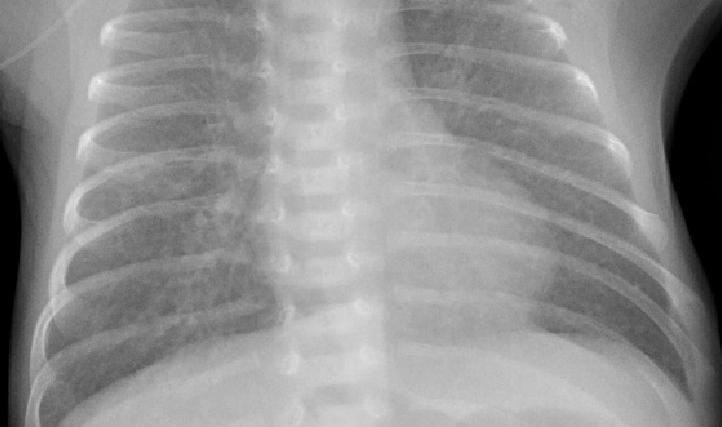

In [6]:
Image.open(str(covid[0]))

In [7]:
covid_xray_data = {
    'non-covid': list(data_dir.glob('non-covid/*.jpeg')) ,
    'covid': list(data_dir.glob('covid/*.jpeg'))
}

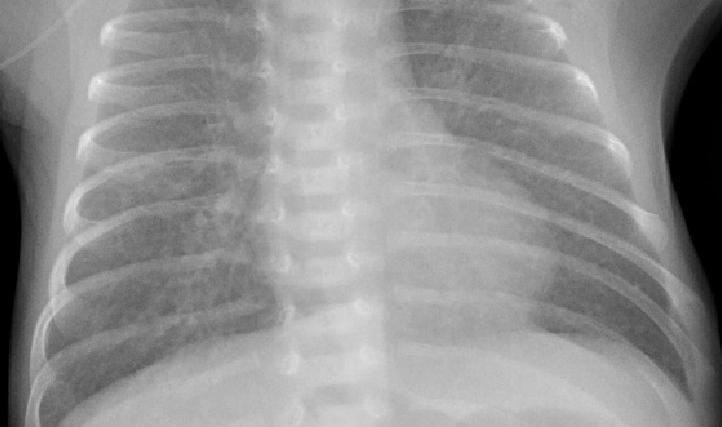

In [8]:
Image.open(covid_xray_data['covid'][0])

In [9]:
covid_xray_label = {
    'non-covid':0,
    'covid':1
}

In [10]:
%%time

X,y = [],[]

for name,images in covid_xray_data.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img,(224,224))
        X.append(img)
        y.append(covid_xray_label[name])

CPU times: total: 20.4 s
Wall time: 1min 48s


In [11]:
X[0]

array([[[ 24,  24,  24],
        [ 20,  20,  20],
        [ 19,  19,  19],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 96,  96,  96]],

       [[ 22,  22,  22],
        [ 22,  22,  22],
        [ 17,  17,  17],
        ...,
        [ 91,  91,  91],
        [ 95,  95,  95],
        [ 95,  95,  95]],

       [[ 25,  25,  25],
        [ 21,  21,  21],
        [ 20,  20,  20],
        ...,
        [ 93,  93,  93],
        [ 93,  93,  93],
        [ 92,  92,  92]],

       ...,

       [[ 29,  29,  29],
        [ 29,  29,  29],
        [ 29,  29,  29],
        ...,
        [ 61,  61,  61],
        [ 59,  59,  59],
        [ 59,  59,  59]],

       [[ 34,  34,  34],
        [ 33,  33,  33],
        [ 35,  35,  35],
        ...,
        [ 79,  79,  79],
        [ 81,  81,  81],
        [ 82,  82,  82]],

       [[ 46,  46,  46],
        [ 45,  45,  45],
        [ 45,  45,  45],
        ...,
        [108, 108, 108],
        [113, 113, 113],
        [110, 110, 110]]

In [12]:
type(X)

list

In [13]:
# convert X and y into numpy array

X = np.array(X)
y = np.array(y)

type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [14]:
# Normalized X 

X = X/255
X[0]

array([[[0.09411765, 0.09411765, 0.09411765],
        [0.07843137, 0.07843137, 0.07843137],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        ...,
        [0.36862745, 0.36862745, 0.36862745],
        [0.36862745, 0.36862745, 0.36862745],
        [0.37647059, 0.37647059, 0.37647059]],

       [[0.08627451, 0.08627451, 0.08627451],
        [0.08627451, 0.08627451, 0.08627451],
        [0.06666667, 0.06666667, 0.06666667],
        ...,
        [0.35686275, 0.35686275, 0.35686275],
        [0.37254902, 0.37254902, 0.37254902],
        [0.37254902, 0.37254902, 0.37254902]],

       [[0.09803922, 0.09803922, 0.09803922],
        [0.08235294, 0.08235294, 0.08235294],
        [0.07843137, 0.07843137, 0.07843137],
        ...,
        [0.36470588, 0.36470588, 0.36470588],
        [0.36470588, 0.36470588, 0.36470588],
        [0.36078431, 0.36078431, 0.36078431]],

       ...,

       [[0.11372549, 0.11372549, 0.11372549],
        [0.11372549, 0.11372549, 0.11372549],
        [0.11372549, 0

# Modelling

In [18]:
%%time
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping


X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.2,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)


model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


early_stopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              restore_best_weights=True)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=1000,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
78/78 [==============================] - 50s 611ms/step - loss: 0.5282 - accuracy: 0.7739 - val_loss: 0.4182 - val_accuracy: 0.8900
Epoch 2/1000
78/78 [==============================] - 47s 606ms/step - loss: 0.2228 - accuracy: 0.9308 - val_loss: 0.1735 - val_accuracy: 0.9320
Epoch 3/1000
78/78 [==============================] - 45s 582ms/step - loss: 0.1137 - accuracy: 0.9575 - val_loss: 0.2554 - val_accuracy: 0.8803
Epoch 4/1000
78/78 [==============================] - 43s 552ms/step - loss: 0.0866 - accuracy: 0.9680 - val_loss: 0.1519 - val_accuracy: 0.9385
Epoch 5/1000
78/78 [==============================] - 43s 547ms/step - loss: 0.0721 - accuracy: 0.9753 - val_loss: 0.1416 - val_accuracy: 0.9482
Epoch 6/1000
78/78 [==============================] - 46s 586ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.1508 - val_accuracy: 0.9515
Epoch 7/1000
78/78 [==============================] - 45s 582ms/step - loss: 0.0517 - accuracy: 0.9814 - val_loss: 0.1890 - val_ac

In [19]:
model.evaluate(X_train,y_train)

78/78 [==============================] - 9s 119ms/step - loss: 0.0402 - accuracy: 0.9899


[0.04019675776362419, 0.9898867607116699]

In [20]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 1s 108ms/step - loss: 0.0781 - accuracy: 0.9645


[0.07808291167020798, 0.9645161032676697]

In [21]:
from sklearn.metrics import classification_report

y_preds = np.round(model.predict(X_test))

print(classification_report(y_test,y_preds))

10/10 [==============================] - 1s 111ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.97      0.97      0.97       171

    accuracy                           0.96       310
   macro avg       0.96      0.96      0.96       310
weighted avg       0.96      0.96      0.96       310



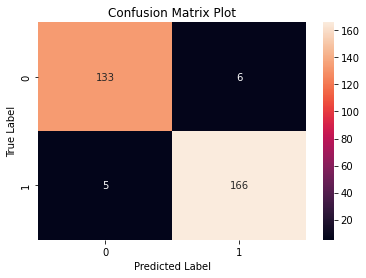

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matr = confusion_matrix(y_test,y_preds)

sns.heatmap(conf_matr,annot=True,fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Plot');

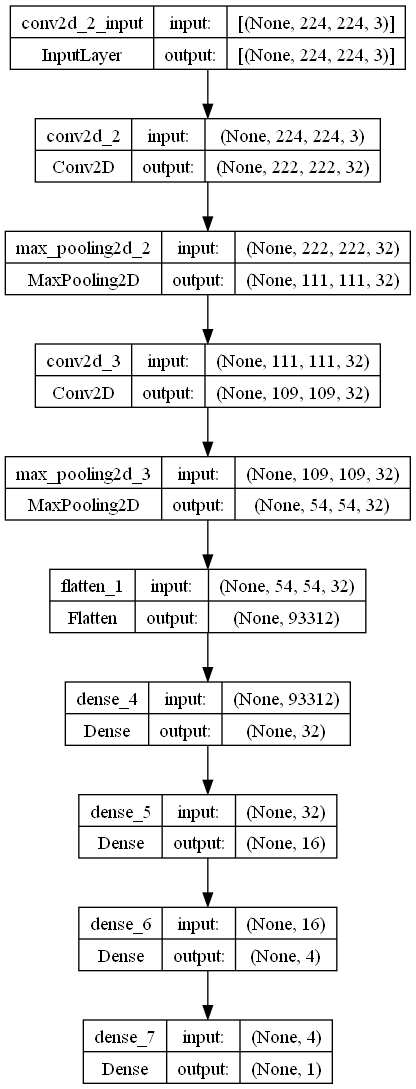

In [29]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 93312)             0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [33]:
model.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.43097222e-01, -4.34232131e-03, -8.38310793e-02,
            1.37482151e-01, -1.18909977e-01, -8.66645798e-02,
           -1.00169465e-01, -1.30111292e-01, -5.03706522e-02,
            8.65318999e-02, -2.51868367e-02,  5.26459627e-02,
           -1.03385754e-01, -6.12998381e-02,  3.50497440e-02,
            1.31681830e-01,  3.15279998e-02, -8.19469765e-02,
            1.06229663e-01, -4.08696160e-02, -1.00806721e-01,
            1.38610676e-02, -2.68251617e-02,  2.55490770e-03,
           -1.18246064e-01,  2.64578369e-02, -1.26768127e-01,
            5.76507933e-02, -1.19649135e-01,  3.17860730e-02,
            7.76425749e-02, -7.51383901e-02],
          [-9.73092467e-02,  5.56048788e-02, -3.48277949e-02,
            1.38287798e-01, -6.65460378e-02,  1.21565618e-01,
           -2.73181014e-02, -7.10379183e-02, -8.02290142e-02,
            4.06130664e-02,  8.74248296e-02,  3.25365574e-03,
          

# Saving trained model

In [34]:
model.save('my_model.h5')

C:\Users\ASUS ROG\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
